In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score, mean_squared_error, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
sb.set()


In [2]:
#IMPORT CLEANED DATASET FROM CSV FILE
cardio_clean = pd.read_csv('Dataset\cardio_clean.csv')

In [3]:
cardio_clean.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,M,168,62.0,22.0,110,80,N,N,0,0,1,0
1,1,55,F,156,85.0,34.9,140,90,H,N,0,0,1,1
2,2,52,F,165,64.0,23.5,130,70,H,N,0,0,0,1
3,3,48,M,169,82.0,28.7,150,100,N,N,0,0,1,1
4,8,60,F,151,67.0,29.4,120,80,B,B,0,0,0,0


In [4]:
cardio_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58880 entries, 0 to 58879
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      58880 non-null  int64  
 1   Age     58880 non-null  int64  
 2   Gender  58880 non-null  object 
 3   Height  58880 non-null  int64  
 4   Weight  58880 non-null  float64
 5   BMI     58880 non-null  float64
 6   AP_HI   58880 non-null  int64  
 7   AP_LO   58880 non-null  int64  
 8   Chol    58880 non-null  object 
 9   Gluc    58880 non-null  object 
 10  Smoke   58880 non-null  int64  
 11  Alco    58880 non-null  int64  
 12  Active  58880 non-null  int64  
 13  Cardio  58880 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 6.3+ MB


# Random Forest

In [5]:
#change categorical-level to numeric-level

cardio_clean['Chol']=cardio_clean['Chol'].replace(['N','B','H'],[0,5,10]) 
cardio_clean['Gluc']=cardio_clean['Gluc'].replace(['N','B','H'],[0,5,10])
cardio_clean['Gender']=cardio_clean['Gender'].replace(['M','F'],[0,1])
cardio_clean.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,0,168,62.0,22.0,110,80,0,0,0,0,1,0
1,1,55,1,156,85.0,34.9,140,90,10,0,0,0,1,1
2,2,52,1,165,64.0,23.5,130,70,10,0,0,0,0,1
3,3,48,0,169,82.0,28.7,150,100,0,0,0,0,1,1
4,8,60,1,151,67.0,29.4,120,80,5,5,0,0,0,0


In [6]:
# Separate the predictors to X and Response to y
y =cardio_clean['Cardio']
X =cardio_clean.drop(['Cardio'],axis=1)
X =X.drop(['id'],axis=1)
X.head()

,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active
0,50,0,168,62.0,22.0,110,80,0,0,0,0,1
1,55,1,156,85.0,34.9,140,90,10,0,0,0,1
2,52,1,165,64.0,23.5,130,70,10,0,0,0,0
3,48,0,169,82.0,28.7,150,100,0,0,0,0,1
4,60,1,151,67.0,29.4,120,80,5,5,0,0,0


In [7]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

train Classification report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75     22397
           1       0.77      0.64      0.70     21763

    accuracy                           0.73     44160
   macro avg       0.73      0.73      0.72     44160
weighted avg       0.73      0.73      0.72     44160

Matthews corrcoef  (MCC) 	: 0.45935780615812
train accuracy: 0.7271286231884058

test Classification report:
               precision    recall  f1-score   support

           0       0.69      0.81      0.75      7482
           1       0.76      0.63      0.69      7238

    accuracy                           0.72     14720
   macro avg       0.73      0.72      0.72     14720
weighted avg       0.73      0.72      0.72     14720

Matthews corrcoef  (MCC) 	: 0.449341833037794
test accuracy : 0.7222146739130435



<AxesSubplot:>

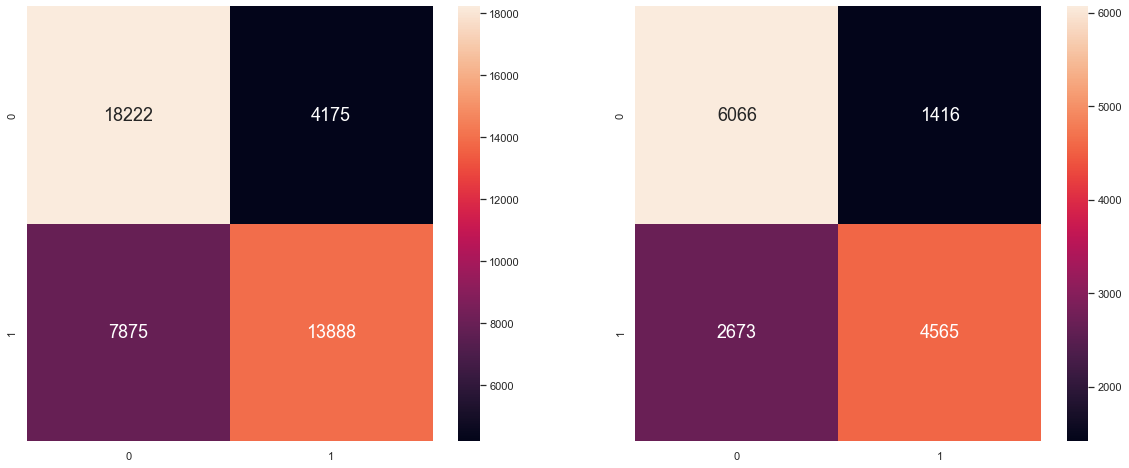

In [8]:
#n_estimators = number of trees used, 
#these two parameters keep the test accuracy around the same level while reducing overfitting

rf_Model=RandomForestClassifier(n_estimators=50,max_depth=6)#,bootstrap=False) 
rf_Model.fit(X_train,y_train)
y_train_pred=rf_Model.predict(X_train)
y_test_pred=rf_Model.predict(X_test)
rf_Model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_Model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_Model_train_as = accuracy_score(y_train,y_train_pred)
rf_Model_test_as = accuracy_score(y_test,y_test_pred)

# Check the Goodness of Fit (on Train Data)
print('train Classification report:\n',classification_report(y_train,y_train_pred))
print("Matthews corrcoef  (MCC) \t:", rf_Model_train_mcc)
print('train accuracy:', rf_Model_train_as)
print()

# Check the Goodness of Fit (on Test Data)
print('test Classification report:\n',classification_report(y_test,y_test_pred))
print("Matthews corrcoef  (MCC) \t:", rf_Model_test_mcc)
print('test accuracy :', rf_Model_test_as)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(20, 8))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [9]:
# Split the Dataset into Train and Validation.
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

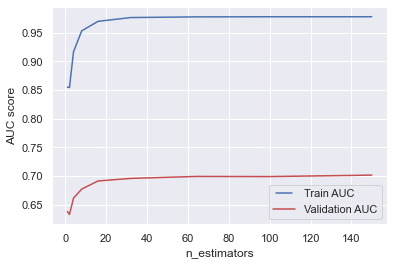

In [10]:
# Improve accuracy using Area Under Curve Score.
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 150]
train_results = []
test_results = []

for estimator in n_estimators:
    
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_validate)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validate, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Validation AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

We observe that for n_estimator = 60, increase in n_estimators does not increase the AUC score.

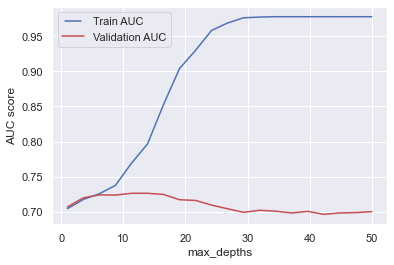

In [11]:
max_depths = np.linspace(1, 50, 20, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_validate)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validate, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Validation AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depths')
plt.show()

We observe that for max_depths = 15, increase in max_depths does not result in significant increase in train AUC, but a significant drop in validation. Hence beyond max_depths = 15 would result in overfitting.

train Classification report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84     17913
           1       0.87      0.77      0.82     17415

    accuracy                           0.83     35328
   macro avg       0.84      0.83      0.83     35328
weighted avg       0.84      0.83      0.83     35328

Matthews corrcoef  (MCC) 	: 0.6667950445019688
train accuracy: 0.8316915760869565

test Classification report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      7482
           1       0.74      0.67      0.71      7238

    accuracy                           0.72     14720
   macro avg       0.73      0.72      0.72     14720
weighted avg       0.73      0.72      0.72     14720

Matthews corrcoef  (MCC) 	: 0.44874751773600613
test accuracy : 0.7239809782608696



<AxesSubplot:>

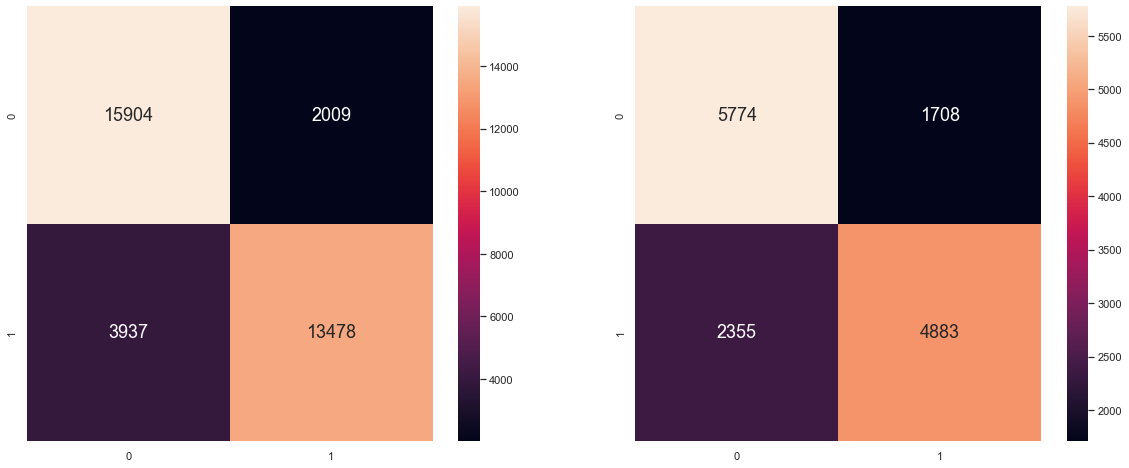

In [12]:
#n_estimators = number of trees used, 
#these two parameters keep the test accuracy around the same level while reducing overfitting

rf_Model=RandomForestClassifier(n_estimators=60,max_depth=15,bootstrap=True) 
rf_Model.fit(X_train,y_train)
y_train_pred=rf_Model.predict(X_train)
y_test_pred=rf_Model.predict(X_test)
rf_Model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_Model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_Model_train_as = accuracy_score(y_train,y_train_pred)
rf_Model_test_as = accuracy_score(y_test,y_test_pred)

# Check the Goodness of Fit (on Train Data)
print('train Classification report:\n',classification_report(y_train,y_train_pred))
print("Matthews corrcoef  (MCC) \t:", rf_Model_train_mcc)
print('train accuracy:', rf_Model_train_as)
print()

# Check the Goodness of Fit (on Test Data)
print('test Classification report:\n',classification_report(y_test,y_test_pred))
print("Matthews corrcoef  (MCC) \t:", rf_Model_test_mcc)
print('test accuracy :', rf_Model_test_as)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(20, 8))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])